In [17]:
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

In [6]:
userInfoFile = open("UserInfo.txt", 'r')
lines = userInfoFile.readlines()
mongodb_username = lines[4].strip()
mongodb_password = lines[5].strip()
mongodb_ip = lines[6].strip()
clientString = "mongodb://" + mongodb_username + ":" + mongodb_password + "@" + mongodb_ip + ":27017"
client = MongoClient(clientString)
db = client['Reddit']

In [43]:
avgMovieSentiment = []
avgTvSentiment = []
for collection in db.list_collection_names():
    movieSentiment = []
    for document in db[collection].find({"Subreddit" : "movies"}):
        postSentiment = document['Sentiment']
        if postSentiment != None:
            movieSentiment.append(postSentiment)
        for comment in document['Comments']:
            commentSentiment = comment['Sentiment']
            if commentSentiment != None:
                movieSentiment.append(commentSentiment)
    if len(movieSentiment) == 0:
        continue
    avgMovieSentiment.append(mean(movieSentiment))

In [44]:
for collection in db.list_collection_names():
    tvSentiment = []
    for document in db[collection].find({"Subreddit" : "television"}):
        postSentiment = document['Sentiment']
        if postSentiment != None:
            tvSentiment.append(postSentiment)
        for comment in document['Comments']:
            commentSentiment = comment['Sentiment']
            if commentSentiment != None:
                tvSentiment.append(commentSentiment)
    if len(tvSentiment) == 0:
        continue
    avgTvSentiment.append(mean(tvSentiment))

In [46]:
avgMovieSentimentByPost = []
avgTvSentimentByPost = []
for collection in db.list_collection_names():
    avgSentimentPostAndComment = []
    for document in db[collection].find({"Subreddit" : "movies"}):
        sentiment = []
        postSentiment = document['Sentiment']
        if postSentiment != None:
            sentiment.append(postSentiment)
        for comment in document['Comments']:
            commentSentiment = comment['Sentiment']
            if commentSentiment != None:
                sentiment.append(commentSentiment)
        avgMovieSentimentByPost.append(mean(sentiment))

In [47]:
for collection in db.list_collection_names():
    avgSentimentPostAndComment = []
    for document in db[collection].find({"Subreddit" : "television"}):
        sentiment = []
        postSentiment = document['Sentiment']
        if postSentiment != None:
            sentiment.append(postSentiment)
        for comment in document['Comments']:
            commentSentiment = comment['Sentiment']
            if commentSentiment != None:
                sentiment.append(commentSentiment)
        avgTvSentimentByPost.append(mean(sentiment))

In [49]:
avgMovieSentiment = [10*x for x in avgMovieSentiment]
avgTvSentiment = [10*x for x in avgTvSentiment]
avgMovieSentimentByPost = [10*x for x in avgMovieSentimentByPost]
avgTvSentimentByPost = [10*x for x in avgTvSentimentByPost]

Text(0.5, 1.0, 'Average Sentiment for Movies')

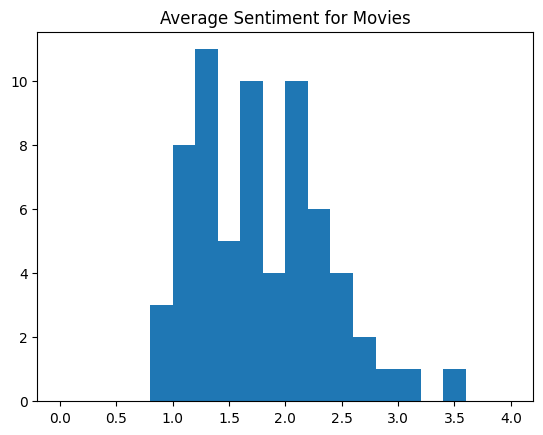

In [50]:
plt.hist(avgMovieSentiment, bins=20, range=(0,4))
plt.title("Average Sentiment for Movies")

Text(0.5, 1.0, 'Average Sentiment for TV Shows')

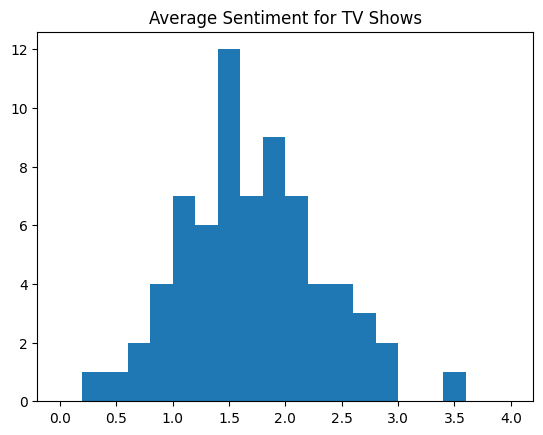

In [51]:
plt.hist(avgTvSentiment, bins=20, range=(0,4))
plt.title("Average Sentiment for TV Shows")

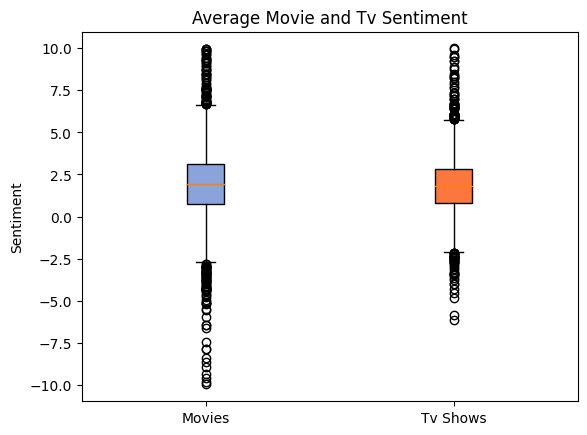

In [85]:
data = [avgMovieSentimentByPost, avgTvSentimentByPost]
box = plt.boxplot(data, patch_artist=True)
colors = ['#8BA3DB', '#FC773D']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1, 2], ['Movies', 'Tv Shows'])
plt.title("Average Movie and Tv Sentiment")
plt.ylabel("Sentiment")
plt.show()

In [55]:
oldMovies = ["The Godfather","The Shawshank Redemption","Schindler's List","Raging Bull","Casablanca","Citizen Kane","Gone with the Wind","The Wizard of Oz","One Flew Over the Cuckoo's Nest","Lawrence of Arabia","Vertigo","Psycho","The Godfather Part II","On the Waterfront","Sunset Blvd.","Forrest Gump","The Sound of Music","Angry Men","West Side Story","Star Wars: Episode IV - A New Hope","2001: A Space Odyssey","E.T. the Extra-Terrestrial","The Silence of the Lambs","Chinatown","The Bridge on the River Kwai","Singin' in the Rain","It's a Wonderful Life","Dr.Strangelove or: How I learned to Stop Worrying and Love the Bomb","Some Like It Hot","Ben-Hur","Apocalypse Now","Amadeus","The Lord of the Rings: The Return of the King","Gladiator","Titanic","From Here to Eternity","Saving Private Ryan","Unforgiven","Indiana Jones and the Raiders of the Lost Ark","Rocky","A Streetcar Named Desire","The Philadelphia Story","To Kill a Mockingbird","An American in Paris","The Best Years of Our Lives","My Fair Lady","A Clockwork Orange","Doctor Zhivago","The Searches","Jaws","Patton","Butch Cassidy and the Sundance Kid","The Treasure of the Sierra Madre","The Good, the Bad and the Ugly","The Apartment","Platoon","High Noon","Braveheart","Dances with Wolves","Jurassic Park","The Exorcist","The Pianist","Goodfellas","The Deer Hunter","All Quiet on the Western Front","Bonnie and Clyde","The French Connection","City Lights","It Happened One Night","A Place in the Sun","Midnight Cowboy","Mr. Smith Goes to Washington","Rain Man","Annie Hall","Fargo","Giant","Shane","The Grapes of Wrath","The Green Mile","Close Encounters of the Third Kind","Nashville","Network","The Graduate","American Graffiti","Pulp Fiction","Terms of Endearment","Good Will Hunting","The African Queen","Stagecoach","Mutiny on the Bounty","The Great Dictator","Double Indemnity","The Maltese Falcon","Wuthering Heights","Taxi Driver","Rear Window","The Third Man","Rebel Without a Cause","North by Northwest","Yankee Doodle Dandy"]
newMovies = ["Toni Erdmann","Requiem for a Dream","Carlos","The Gleaners and I","Ten","White Material","Finding Nemo","Moonrise Kingdom","Let the Right One In","Ratatouille","The Assassination of Jesse James by the Coward Robert Ford","The Secret in Their Eyes","The Pianist","The Headless Woman","Spotlight","Amélie","Far From Heaven","A Prophet","Her","A.I. Artificial Intelligence","A Serious Man","Shame","The Return","Almost Famous","The Wolf of Wall Street","The Diving Bell and the Butterfly","Dogville","Inherent Vice","Spring Breakers","Before Sunset","Only Lovers Left Alive","Tabu","Stories We Tell","Carol","The Royal Tenenbaums","The Hurt Locker","Spring, Summer Fall, Winter… and Spring","Fish Tank","The Great Beauty","The Turin Horse","Inglourious Basterds","Under the Skin","Syndromes and a Century","A history of Violence","Zero Dark Thirty","Werckmeister Harmonies","Moolaadé","Ida","Once Upon a Time in Anatolia","Moulin Rouge!","Tropical Malady","Inception","The Assassin","Goodbye to Language","Brooklyn","Leviathan","Certified Copy","Blue is the Warmest Color","12 Years a Slave","Melancholia","Amour","Inside Out","Brokeback Mountain","The New World","City of God","Uncle Boonmee Who Can Recall His Past Lives","Timbuktu","Crouching Tiger","Son of Saul","The Dark Knight","The Lives of Others","Margaret","Oldboy","WALL-E","Talk to Her","The Social Network","25th Hour","Memento","The Master","Caché","Lost in Translation","The Grand Budapest Hotel","Synedoche, New York","Mad Max: Fury Road","The White Ribbon","Pans Labyrthnth","Holy Motors","4 Months, 3 Weeks and 2 Days","The Act of Killing","Children of Men","Zodiac","Inside Llewyn Davis","No Country for Old men","A Seperation","Yi Yi: A One and a Two","The Tree of Life","Eternal Sunshine of the Spotless Mind","Boyhood","Spirited Away","There Will Be Blood","In the Mood for Love","Mulholland Drive"]
oldTv = ["What We Do in the Shadows","Oz","The Good FIght","The Odd Couple","Rick and Morty","Squid Game","NewsRadio","The Rockford Files","The Muppet Show","The Tonight Show Starring Johnny Carson","The Wonder Years","The Carol Burnett Show","The Crown","The Kids in the Hall","The Bob Newhart Show","Orange Is the New Black","Fargo","I'm Alan Partridge","Party Down","It's Always Sunny in Philadelphia","Band of Brothers","Mr.Show with Bob and David","Sex and the City","The Jeffersons","Justified","Frasier","The Honeymooners","Buffy the Vampire Slayer","Good Times","Better Things","SCTV","Chappelle's Show","Fawlty Towers","NYPD Blue","The Daily Show With Jon Stewart","Girls","The Golden Girls","South Park","The Dick Van Dyke Show","The Underground Railroad","Taxi","Key & Peele","Six Feet Under","Russian Doll","Community","Halt and Catch Fire","ER","The Office (UK)","Barry","The X-Files","Jeopardy!","Friends","The Shield","My So-Called Life","The West Wing","Columbo","Late Night With David Letterman","Insecure","Battlestar Galactica","BoJack Horseman","The Good Place","Curb Your Enthusiasm","Hill Streets Blues","Arrested Development","I Love Lucy","Lost","The Office","Monty Python's Flying Circus","Better Call Saul","Game of Thrones","Parks and Recreation","Roots","Friday Night Lights","Deadwood","Sesame Street","M*A*S*H","Freaks and Geeks","Watchmen","Star Trek","All in the Family","30 Rock","I May Destroy You","Saturday Night Live","The Leftovers","Twin Peaks","The Larry Sanders Show","The Americans","Veep","The Twilight Zone","Succession","The Mary Tyler Moore Show","Atlanta","Cheers","Mad Men","Seinfeld","Fleabag","The Wire","Breaking Bad","The Simpsons","The Sopranos"]
newTv = ["The Wire","Mad Men","Breaking Bad","Fleabag","Game of Thrones","I May Destroy You","The Leftovers","The Americans","The Office (UK)","Succession","BoJack Horseman","Six Feet Under","Twin Peaks: The Return","Atlanta","Chernobyl","The Crown","30 Rock","Deadwood","Lost","The Thick of It","Curb Your Enthusiasm","Black Mirror","Better Call Saul","Veep","Sherlock","Watchmen","Line of Duty","Friday Night Lights","Parks and Recreation","Girls","True Detective","The Good Wife","The Bridge","Fargo","Downton Abbey","Band of Brothers","The Handmaid's Tale","The Office","Borgen","Schitt's Creek","Peep Show","Money Heist","Community","The Good Fight","Homeland","Grey's Anatomy","Inside No 9","The Bureau","Halt and Catch Fire","Small Axe","This is England 86, 88, and 90","Call My Agent!","Happy Valley","The Shield","The Big Band Theory","The Young Pope","Dark","The Underground Railroad","House of Cards","Avatar: The Last Airbender","The Good Place","Pose","Detectorists","Orange is the New Black","Mare of Easttown","RuPaul's Drag Race","24","Battlestar Galactica","Enlightened","Gilmore Girls","Planet Earth","Utopia","Babylon Berlin","Rick and Morty","American Crime Story","The Killing (Denmark)","Mindhunter","House","OJ: Made in America","Big Little Lies","Insecure","Normal People","Narcos","How I met Your Mother","The Comeback","The OA","Dexter","It's Always Sunny in Philadelphia","Westworld","Show Me a Hero","Treme","Louie","Luther","Catastrophe","Hannibal","Crazy Ex-Girlfriend","Steven Universe","The Queen's Gambit"]

In [63]:
oldMovieSentiment = []
for collection in db.list_collection_names():
    if collection in oldMovies:
        avgSentimentPostAndComment = []
        for document in db[collection].find({"Subreddit" : "movies"}):
            if document['Title'] in oldMovies:
                sentiment = []
                postSentiment = document['Sentiment']
                if postSentiment != None:
                    sentiment.append(postSentiment)
                for comment in document['Comments']:
                    commentSentiment = comment['Sentiment']
                    if commentSentiment != None:
                        sentiment.append(commentSentiment)
                oldMovieSentiment.append(mean(sentiment))

In [64]:
newMovieSentiment = []
for collection in db.list_collection_names():
    if collection in newMovies:
        avgSentimentPostAndComment = []
        for document in db[collection].find({"Subreddit" : "movies"}):
            sentiment = []
            postSentiment = document['Sentiment']
            if postSentiment != None:
                sentiment.append(postSentiment)
            for comment in document['Comments']:
                commentSentiment = comment['Sentiment']
                if commentSentiment != None:
                    sentiment.append(commentSentiment)
            newMovieSentiment.append(mean(sentiment))

In [65]:
oldTvSentiment = []
for collection in db.list_collection_names():
    if collection in oldTv:
        avgSentimentPostAndComment = []
        for document in db[collection].find({"Subreddit" : "television"}):
            if document['Title'] in oldTv:
                sentiment = []
                postSentiment = document['Sentiment']
                if postSentiment != None:
                    sentiment.append(postSentiment)
                for comment in document['Comments']:
                    commentSentiment = comment['Sentiment']
                    if commentSentiment != None:
                        sentiment.append(commentSentiment)
                oldTvSentiment.append(mean(sentiment))

In [66]:
newTvSentiment = []
for collection in db.list_collection_names():
    if collection in newTv:
        avgSentimentPostAndComment = []
        for document in db[collection].find({"Subreddit" : "television"}):
            if document['Title'] in newTv:
                sentiment = []
                postSentiment = document['Sentiment']
                if postSentiment != None:
                    sentiment.append(postSentiment)
                for comment in document['Comments']:
                    commentSentiment = comment['Sentiment']
                    if commentSentiment != None:
                        sentiment.append(commentSentiment)
                newTvSentiment.append(mean(sentiment))

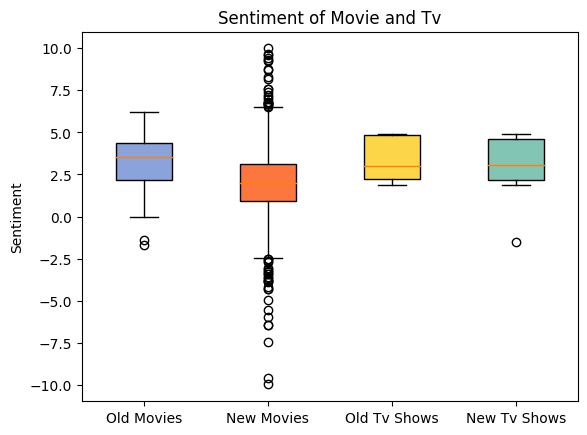

In [84]:
oldMovieSentiment = [10*x for x in oldMovieSentiment]
newMovieSentiment = [10*x for x in newMovieSentiment]
oldTvSentiment = [10*x for x in oldTvSentiment]
newTvSentiment = [10*x for x in newTvSentiment]
data2 = [oldMovieSentiment, newMovieSentiment, oldTvSentiment, newTvSentiment]
box = plt.boxplot(data2, patch_artist=True)
colors = ['#8BA3DB', '#FC773D', '#FCD648', '#83C5B4']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.xticks([1, 2, 3, 4], ['Old Movies', 'New Movies', 'Old Tv Shows', 'New Tv Shows'])
plt.ylabel("Sentiment")
plt.title("Sentiment of Movie and Tv")
plt.show()